In [1]:
import yfinance as yf

btc = yf.Ticker('BTC-USD')

hist = btc.history(period='max', auto_adjust=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-05-28,38507.082031,38856.968750,34779.039062,35697.605469,55200191952,0,0
2021-05-29,35684.156250,37234.500000,33693.929688,34616.066406,45231013335,0,0
2021-05-30,34607.406250,36400.667969,33520.738281,35678.128906,31646080921,0,0


In [2]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist.Close.values
df.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [3]:
from prophet import Prophet

m = Prophet(daily_seasonality=False)
# m = Prophet()

m.fit(df)

In [4]:
future = m.make_future_dataframe(365, freq='D')
forecast = m.predict(future)

In [5]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,187.364625,-7106.153926,3585.336619,187.364625,187.364625,-1977.122309,-1977.122309,-1977.122309,-6.140210,-6.140210,-6.140210,-1970.982099,-1970.982099,-1970.982099,0.0,0.0,0.0,-1789.757684
1,2014-09-18,187.474646,-7127.003853,3414.724323,187.474646,187.474646,-1991.009145,-1991.009145,-1991.009145,-25.393554,-25.393554,-25.393554,-1965.615590,-1965.615590,-1965.615590,0.0,0.0,0.0,-1803.534498
2,2014-09-19,187.584667,-7245.714699,3521.760221,187.584667,187.584667,-1918.196584,-1918.196584,-1918.196584,40.546296,40.546296,40.546296,-1958.742880,-1958.742880,-1958.742880,0.0,0.0,0.0,-1730.611917
3,2014-09-20,187.694689,-7001.521564,3346.978376,187.694689,187.694689,-1940.599824,-1940.599824,-1940.599824,10.118177,10.118177,10.118177,-1950.718001,-1950.718001,-1950.718001,0.0,0.0,0.0,-1752.905135
4,2014-09-21,187.804710,-7263.954080,3561.691394,187.804710,187.804710,-1986.659398,-1986.659398,-1986.659398,-44.764963,-44.764963,-44.764963,-1941.894435,-1941.894435,-1941.894435,0.0,0.0,0.0,-1798.854688


In [6]:
forecast[['ds', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat_lower,yhat_upper
2806,2022-05-28,68164.282921,90311.131726
2807,2022-05-29,68671.233570,90232.965613
2808,2022-05-30,68405.818752,90553.225530
2809,2022-05-31,68319.441921,90587.587699
2810,2022-06-01,68481.828396,90659.157022


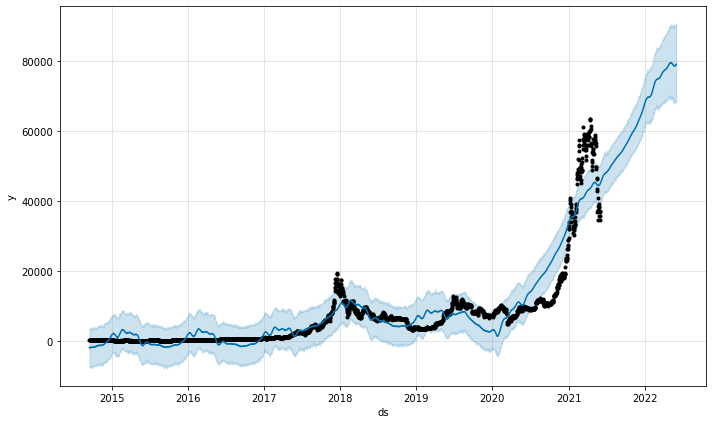

In [7]:
# import seaborn as sns
# sns.set()
m.plot(forecast);


In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)